In [9]:
#imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
#stats-model api import
import statsmodels.api as sm


In [10]:
"""
Two methods to read data, one from an .xlsx sheet and one way from a .csv file the first column of data must be the 
dependent varible, the rest of the columns should be the independent variable(s)
"""

#reading an excel sheet containing the data
data = pd.read_excel(r'C:\Users\karad\Desktop\htc\ctc-hackathon-2022\CAR_Data.xlsx')

#reading a csv file containing data, get rid of first "#" and replace second "#" with directory path to csv file
#data = pd.read_csv('#')

In [11]:
#displaying the first 5 rows, allow user to see if data was correctly displayed
data.head()


,Suicide rate (per 100 000),Electricity Access (% of population),Healthcare Spending Per Capita ($),Hunger Statistics (% of population)
0,17.7,5.74,10,39.2
1,17.4,6.18,11,40.1
2,16.4,6.61,13,40.6
3,15.7,7.05,14,40.5
4,15.1,7.48,15,39.6


In [12]:
#row0 is a list of the headers, e.g ['Suicide rate','Electricity Access', etc..]
row0 = list(data)

#x is the independent variable data other than than first column, which is the dependent variable. 
x=data.drop([row0[0]],axis=1).values

#y is equal to the dependent data, column 0 
y=data[row0[0]].values

In [13]:
"""
trains the model using datasets, test_size set to a high value 
since data is limited; model trains using more input data
"""

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=0)

In [14]:
#create linear regression object

ml = LinearRegression()

#train the model using the training sets
ml.fit(x_train, y_train)

LinearRegression()

In [15]:
#make predictions using the testing set

y_pred = ml.predict(x_test)


Text(0.5, 1.0, 'Actual vs. Predicted')

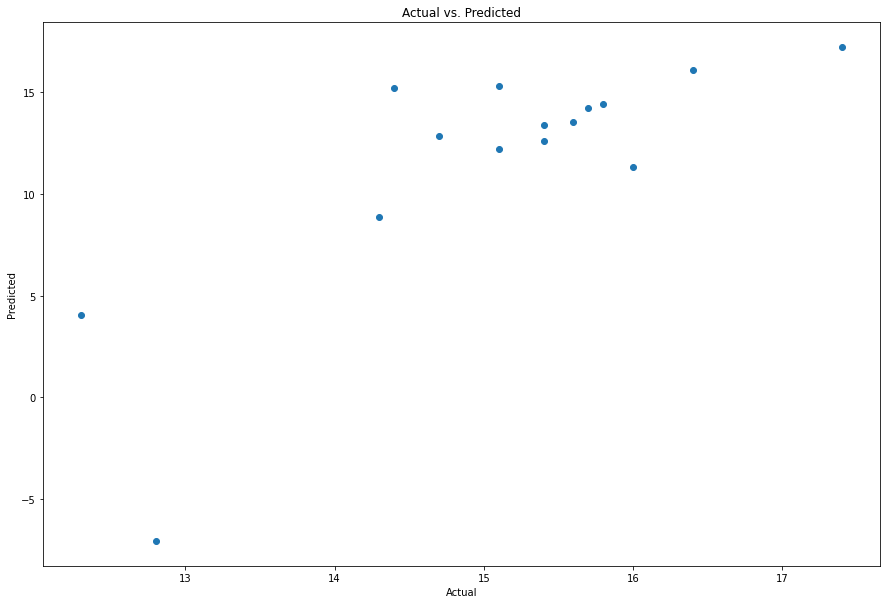

In [16]:
#plotting the data
#TOMORROW DISCUSS WHETHER TO DELETE THIS SECTION OR NOT 

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [17]:
"""
Compares the predicted value from the machine learning model to the actual values,
ensuring that the sum of the residuals is minimal and outliers are made known. 
"""

pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:-1]

,Actual Value,Predicted Value,Difference
0,15.4,13.382575,2.017425
1,17.4,17.239789,0.160211
2,16.0,11.319483,4.680517
3,12.3,4.025632,8.274368
4,14.4,15.204668,-0.804668
5,14.3,8.851374,5.448626
6,15.4,12.614300,2.785700
7,15.1,15.314274,-0.214274
8,16.4,16.115599,0.284401
9,15.7,14.238982,1.461018


In [18]:
"""
using the statsmodels api, we can get important summary statistics such as 
the coefficients for our equations and our p-values from the analysis
"""

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     17.90
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.22e-05
Time:                        21:14:04   Log-Likelihood:                -17.602
No. Observations:                  19   AIC:                             43.20
Df Residuals:                      15   BIC:                             46.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0837      0.951     20.059      0.0

C:\Users\karad\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
"""
logic developed to determine p values that are < 0.05, which indicate a statiscally significant 
relationship between our dependent variable and any of our independent variables
"""

significant_p = []
for i in range(1, len(row0)):
    if est2.pvalues[i] < 0.05:
         significant_p.append(row0[i])
            
significant_p

['Electricity Access (% of population)']

In [127]:
"""
Finding NGO's which can help solve our found problem
"""

#importing NGO's dictionary files
import sys

sys.path.insert(0, r'C:\Users\karad\Desktop\htc\ctc-hackathon-2022')
import NGOS

#solution_NGO = NGO's that can provide a solution to our given correlation
solution_NGO = []

NGO_names = list(NGOS.CAR_NGO.keys())

NGO_keywords = list(NGOS.CAR_NGO.values())

# creates sols list that includes the statistic with significant p value. Then compares every word in the statstic to
# keywords in dictionary file and if they match, puts corresponding NGO name into list.
sols = []
for x in range(len(significant_p)):
    sols.append(significant_p[x].split())

for i in range(len(NGO_names)):
    for j in range(len(NGO_keywords[i])):
        k = j
        l = 0
        while(l < len(significant_p)):
            if (sols[l][k].lower() in NGO_keywords[i]):
                solution_NGO.append(NGO_names[i])
            l += 1

solution_NGO

['INTERNATIONAL RESCUE COMMITTEE, U.K',
 'WORLD VISION UK',
 'A C O R D',
 'International Welfare Allience(IWARELIEF)',
 'Central African Organization']